In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print(f"Train images shape : {train_images.shape}")
print(f"Train labels shape : {train_labels.shape}")
print(f"Test images shape : {test_images.shape}")
print(f"Test labels shape : {test_labels.shape}")

Train images shape : (60000, 28, 28)
Train labels shape : (60000,)
Test images shape : (10000, 28, 28)
Test labels shape : (10000,)


---
## Explore the data with matplotlib

### First visualisation

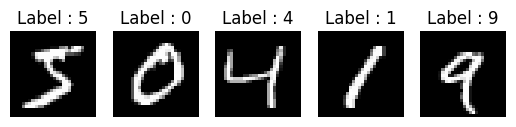

In [5]:
import matplotlib.pyplot as plt

# Display the first five images of the training set
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label : {train_labels[i]}")
    plt.axis('off')
plt.show()

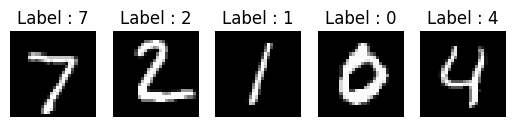

In [6]:
# Display the first five images of the test set
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Label : {test_labels[i]}")
    plt.axis('off')
plt.show()

---
## Exploring statistics of the dataset

In [7]:
import numpy as np
import seaborn as sns

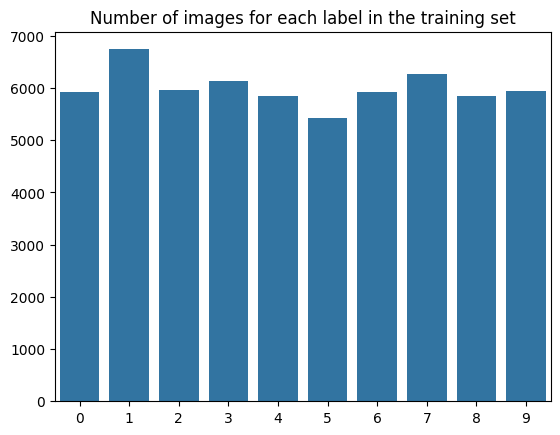

In [10]:
# Display the number of images for each label in the training set
unique, counts = np.unique(train_labels, return_counts=True)
sns.barplot(x=unique, y=counts)
plt.title("Number of images for each label in the training set")
plt.show()

### The dataset is balanced

---
## Preprocessing the data

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Why do we divide by 255 ? Because the pixel values are between 0 and 255. We want to normalize the data so that the pixel values are between 0 and 1.

---
## Building the model

### CNN architecture

We will use a simple CNN architecture with the following layers :
- Conv2D layer with 32 filters and a kernel size of 3x3
- MaxPooling2D layer with a pool size of 2x2
- Conv2D layer with 64 filters and a kernel size of 3x3
- MaxPooling2D layer with a pool size of 2x2
- Conv2D layer with 64 filters and a kernel size of 3x3
- Flatten layer
- Dense layer with 64 units
- Dense layer with 10 units (output layer)

We will use the ReLU activation function for the Conv2D layers and the Dense layer with 64 units. We will use the softmax activation function for the output layer.

In [16]:
# Create the model
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Optimizer : Adam (Adaptive Moment Estimation)
# Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.

# Loss function : Sparse categorical crossentropy
# Sparse categorical crossentropy is a loss function used for classification problems where the output values are integers (in this case, the labels are integers).

In [21]:
# Reshape the data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# train_images.shape[0] is the number of images in the training set
# 28 & 28 are the dimensions of the images in pixels
# 1 is the number of channels (1 for grayscale images, 3 for RGB images)

In [22]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 6s 7ms/step - loss: 0.1903 - accuracy: 0.9418 - val_loss: 0.0574 - val_accuracy: 0.9838
Epoch 2/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0542 - accuracy: 0.9831 - val_loss: 0.0399 - val_accuracy: 0.9880
Epoch 3/10
844/844 [==============================] - 6s 7ms/step - loss: 0.0388 - accuracy: 0.9877 - val_loss: 0.0412 - val_accuracy: 0.9870
Epoch 4/10
844/844 [==============================] - 9s 10ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0343 - val_accuracy: 0.9910
Epoch 5/10
844/844 [==============================] - 9s 11ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.0400 - val_accuracy: 0.9897
Epoch 6/10
844/844 [==============================] - 9s 11ms/step - loss: 0.0199 - accuracy: 0.9936 - val_loss: 0.0285 - val_accuracy: 0.9923
Epoch 7/10
844/844 [==============================] - 9s 11ms/step - loss: 0.0167 - accuracy: 0.9942 - val_loss: 0.0336 - val_accuracy: 0.9915
Ep

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy : {test_acc}")
print(f"Test loss : {test_loss}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0359 - accuracy: 0.9910
Test accuracy : 0.9909999966621399
Test loss : 0.03591400384902954


---
## Visualizing the training process

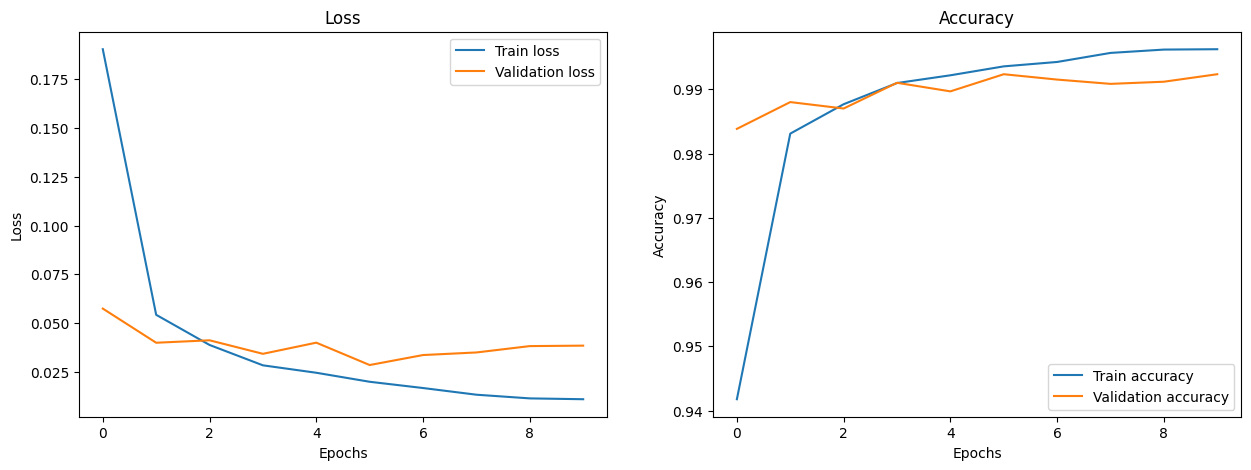

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Plot the loss
ax[0].plot(history.history['loss'], label='Train loss')
ax[0].plot(history.history['val_loss'], label='Validation loss')
ax[0].set_title('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()

# Plot the accuracy
ax[1].plot(history.history['accuracy'], label='Train accuracy')
ax[1].plot(history.history['val_accuracy'], label='Validation accuracy')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

plt.show()

---
## Predictions

### Predictions on the test set

313/313 [==============================] - 1s 2ms/step


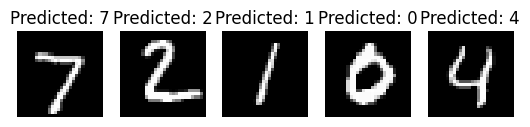

In [29]:
# Make predictions on the test set
predictions = model.predict(test_images)

# Display the first five predictions
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()

# Conclusion
# The model has an accuracy of 99.1% on the test set. The predictions are correct for the first five images of the test set. The model is able to recognize the digits with a high accuracy.

# The model could be improved by :
# - Adding dropout layers to reduce overfitting
# - Adding more layers to the model
# - Using data augmentation to increase the size of the training set
# - Using a learning rate scheduler to adjust the learning rate during training
# - Using a different optimizer

# The model could also be evaluated on a larger test set to get a more accurate measure of its performance.

# In this notebook, we built a simple CNN model to recognize handwritten digits from the MNIST dataset. We visualized the training process and made predictions on the test set. The model achieved a high accuracy on the test set and was able to recognize the digits with a high accuracy.

# Thank you for reading this notebook. I hope you found it helpful. If you have any questions or suggestions, feel free to leave a comment.

---
### References

# Matthieu Freire